In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('churn.csv')

In [75]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [76]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [78]:
df.customerID.nunique

<bound method IndexOpsMixin.nunique of 0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object>

In [79]:
#since customer id are unique we can set it as index column

In [80]:
df=df.set_index('customerID')

In [81]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [82]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [83]:
#no null values present in the data

In [84]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [85]:
df.describe()  #for integeral columns

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='Churn', ylabel='count'>

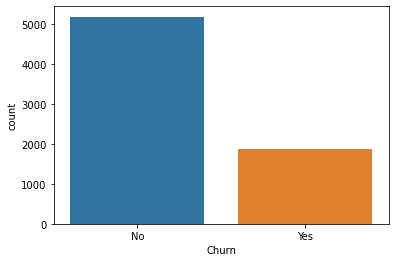

In [86]:
sns.countplot(df['Churn'])    # to check how the values are distributed at the target column

In [87]:
#LABEL ENCODING  to change object data to int data

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        df[i]=le.fit_transform(df[i])

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [89]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


In [90]:
df.corr()['Churn'].sort_values()  # to find which column is in more correlation with the output column

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
TotalCharges        0.014479
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

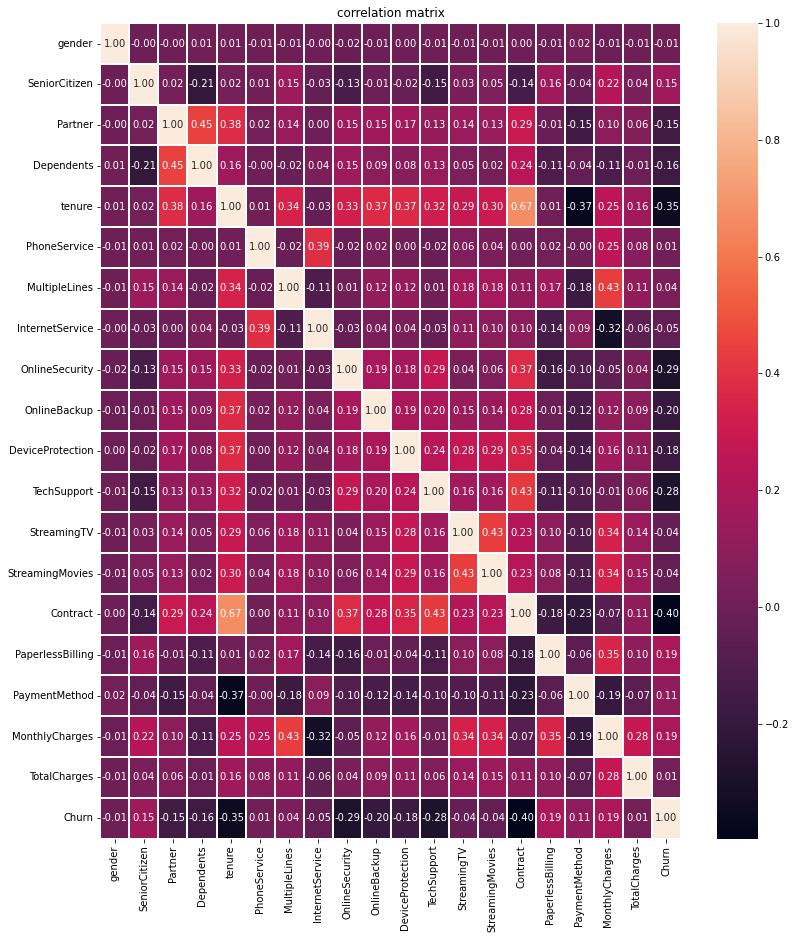

In [91]:
plt.figure(figsize=(13,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=2)
plt.title('correlation matrix')
plt.show()

In [92]:
#bivariant analysis between target column and input columns

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

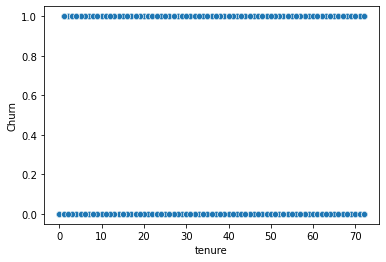

In [93]:
sns.scatterplot(x='tenure',y='Churn',data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

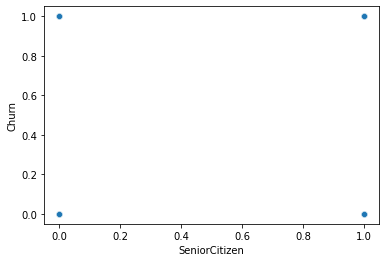

In [94]:
sns.scatterplot(x='SeniorCitizen',y='Churn',data=df)

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

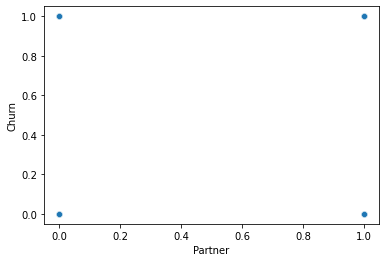

In [95]:
sns.scatterplot(x='Partner',y='Churn',data=df)

<AxesSubplot:xlabel='Contract', ylabel='Churn'>

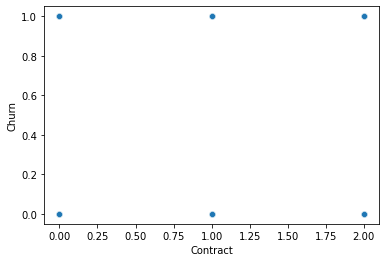

In [96]:
sns.scatterplot(x='Contract',y='Churn',data=df)

In [97]:
#from the above graphs we arent able to predict any relationships among the data

In [98]:
#To check  skewness 

In [99]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

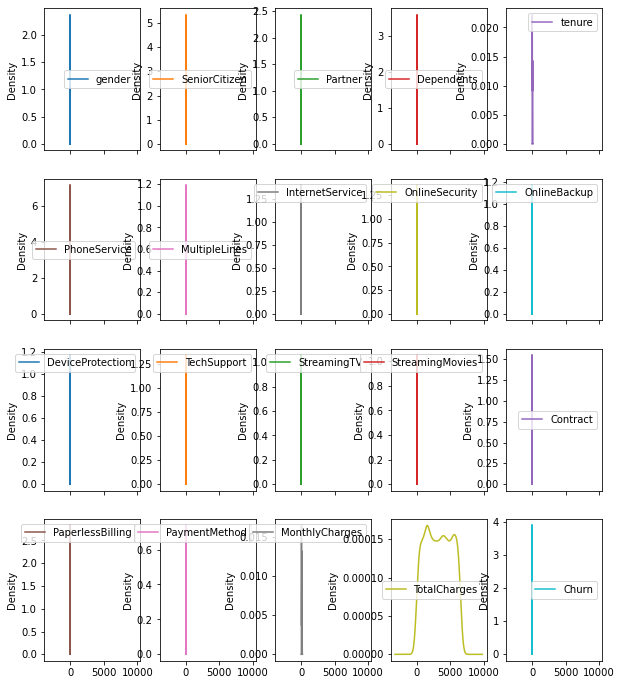

In [100]:
df.plot(kind='kde',subplots=True,layout=(4,5),figsize=(10,12))

In [101]:
#we dont see much skewness in the data since majority are categorical data

In [102]:
#to Check outliers

gender                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
SeniorCitizen        AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Partner               AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Dependents           AxesSubplot(0.606034,0.71587;0.133621x0.16413)
tenure               AxesSubplot(0.766379,0.71587;0.133621x0.16413)
PhoneService           AxesSubplot(0.125,0.518913;0.133621x0.16413)
MultipleLines       AxesSubplot(0.285345,0.518913;0.133621x0.16413)
InternetService      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
OnlineSecurity      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
OnlineBackup        AxesSubplot(0.766379,0.518913;0.133621x0.16413)
DeviceProtection       AxesSubplot(0.125,0.321957;0.133621x0.16413)
TechSupport         AxesSubplot(0.285345,0.321957;0.133621x0.16413)
StreamingTV          AxesSubplot(0.44569,0.321957;0.133621x0.16413)
StreamingMovies     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Contract            AxesSubplot(0.766379,0.32195

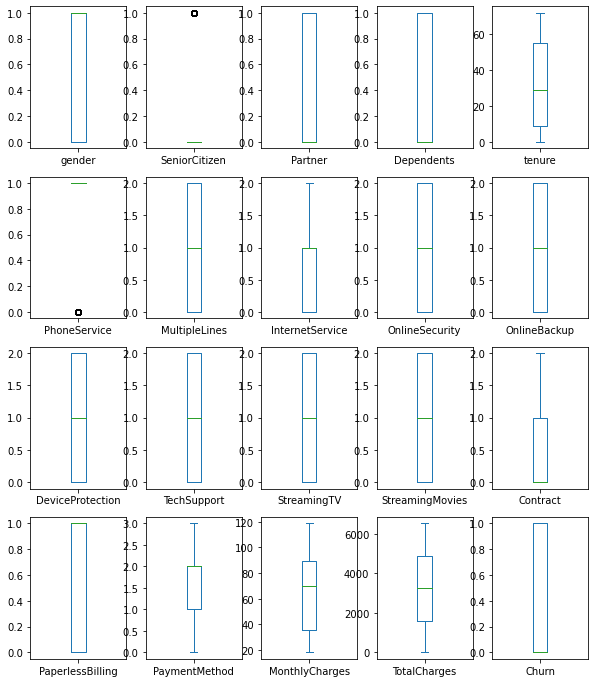

In [103]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,12))

In [104]:
#since most of them are categorical data we find very less outliers present

In [105]:
#splitting of DATA

In [106]:
x=df.drop(['Churn'],axis=1)
y=df.Churn

In [107]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994


In [108]:
y

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: Churn, Length: 7043, dtype: int32

In [109]:
#we will fit the model with machine learning models

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import accuracy_score

In [111]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random_state:',i)
        print('Training accuracy_score',accuracy_score(y_train,pred_train)*100)
        print('testing accuracy_score',accuracy_score(y_test,pred_test)*100,'\n\n')

At random_state: 103
Training accuracy_score 80.20944266950657
testing accuracy_score 80.19872249822569 


At random_state: 125
Training accuracy_score 80.28044018459354
testing accuracy_score 80.34066713981547 


At random_state: 126
Training accuracy_score 79.48171813986511
testing accuracy_score 79.4889992902768 


At random_state: 146
Training accuracy_score 79.99645012424565
testing accuracy_score 79.98580553584102 


At random_state: 207
Training accuracy_score 79.57046503372382
testing accuracy_score 79.63094393186657 


At random_state: 265
Training accuracy_score 80.31593894213702
testing accuracy_score 80.26969481902059 


At random_state: 278
Training accuracy_score 80.04969826056087
testing accuracy_score 79.98580553584102 


At random_state: 295
Training accuracy_score 79.6414625488108
testing accuracy_score 79.55997161107167 


At random_state: 355
Training accuracy_score 79.58821441249556
testing accuracy_score 79.63094393186657 


At random_state: 374
Training accuracy_

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=103,test_size=.20)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1046
           1       0.21      0.19      0.20       363

    accuracy                           0.61      1409
   macro avg       0.47      0.47      0.47      1409
weighted avg       0.60      0.61      0.60      1409



In [113]:
#we see that training and testing accuracy are good but the f1 score is very less in differntiating amomg the target variables

In [114]:
#we shall check with other models

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8019872249822569
[[945 101]
 [178 185]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1046
           1       0.65      0.51      0.57       363

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



accuracy score of GaussianNB() is:
0.7551454932576295
[[802 244]
 [101 262]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1046
           1       0.52      0.72      0.60       363

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.76      0.77      1409



accuracy score of SVC() is:
0.7423704755145494
[[1046    0]
 [ 363    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      10

In [116]:
#we see logistic regression is providing highest accuracy but its failing in f1score

In [117]:
#we will apply smote to balance the data

In [118]:
from imblearn.over_sampling import SMOTE  

In [119]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [120]:
trainx.shape

(10348, 19)

In [121]:
trainy.shape

(10348,)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=42,test_size=0.20)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8106280193236715
[[801 220]
 [172 877]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1021
           1       0.80      0.84      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



accuracy score of GaussianNB() is:
0.7971014492753623
[[791 230]
 [190 859]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1021
           1       0.79      0.82      0.80      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



accuracy score of SVC() is:
0.5937198067632851
[[564 457]
 [384 665]]
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1021
 

In [123]:
#For the smote applied data we found that accuracy is improved and the f1 score is also imporved.
#so the model can differntiate between fraud if its yes or no

In [124]:
#we are getting highest accuracy with Logistic regression and the f1score is also imporved.

In [125]:
pred_test=lg.predict(x_test)


In [126]:
#cross validation

In [127]:
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)

In [128]:
for j in range(2,10):
    lsscore= cross_val_score(lg,trainx,trainy,cv=j)
    lsc= lsscore.mean()
    print('at cv=',j)
    print('cross validation score is',lsc *100)
    print('accuracy_score is',lss*100)
    print('\n')

at cv= 2
cross validation score is 77.83146501739466
accuracy_score is 74.44444444444444


at cv= 3
cross validation score is 78.66321821209817
accuracy_score is 74.44444444444444


at cv= 4
cross validation score is 79.5129493621956
accuracy_score is 74.44444444444444


at cv= 5
cross validation score is 79.96785770156649
accuracy_score is 74.44444444444444


at cv= 6
cross validation score is 79.90993308450184
accuracy_score is 74.44444444444444


at cv= 7
cross validation score is 80.16149672971703
accuracy_score is 74.44444444444444


at cv= 8
cross validation score is 80.18100077578592
accuracy_score is 74.44444444444444


at cv= 9
cross validation score is 80.29658219918183
accuracy_score is 74.44444444444444




In [129]:
#at cv =9 we are getting highest croess validation score of 80%

In [146]:
#grid search CV with hyper parameter tuning

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid_param={
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20)}
gd_sr=GridSearchCV(estimator=lg,
                   param_grid=grid_param,
                   scoring='accuracy',
                   cv=9)


gd_sr.fit(trainx,trainy)
best_parameters=gd_sr.best_params_
print(best_parameters)

{'C': 10000.0, 'penalty': 'l2'}


In [141]:
gd_sr_predictions = gd_sr.predict(x_test)
 
# print classification report
print(classification_report(y_test,gd_sr_predictions))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1021
           1       0.80      0.84      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



In [144]:
lg=LogisticRegression(C=10000.0, penalty='l2')
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred_dec=lg.predict(x_test)

dts=accuracy_score(y_test,pred_dec)
print('acurac _score:',dts*100)

rfscore=cross_val_score(lg,trainx,trainy,cv=9)
rfc=rfscore.mean()
print('cross val score',rfc*100)

acurac _score: 81.15942028985508
cross val score 80.39315010321934


In [145]:
#we are getting equal accuracy score and cross value score

In [152]:
#using ensemble method

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.855072463768116
[[873 148]
 [152 897]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [151]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8347826086956521
[[805 216]
 [126 923]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1021
           1       0.81      0.88      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.84      0.83      0.83      2070
weighted avg       0.84      0.83      0.83      2070



In [154]:
#using ensemvble method the accuracy has increased to 86%

In [155]:
# AUC ROC Curve

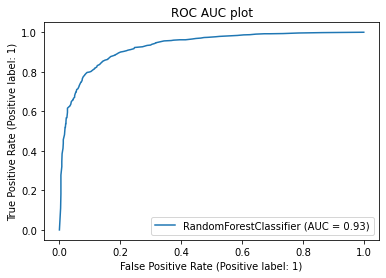

In [156]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [149]:
#hence the model is working at 93% accuracy to differntiate wheater it is churn or not churn data
#its working at 86% accuracy

In [157]:
#saving the model

In [158]:
import joblib
joblib.dump(rf,'churn.pkl')

['churn.pkl']